# K-Means Clustering

## Import Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline 
import numpy as np 

In [2]:
#importing the dataset
dataset = pd.read_csv('C:/Users/aksin52/Documents/Statistics Online Classes/Cust_Spend_Data.csv')
#creating a duplicate dataset to work on
dataset1 = dataset
# peeking at the dataset
dataset1.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [3]:
#Descriptive stats of the variables in data
dataset1.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
data_all_std=pd.DataFrame(std.fit_transform(dataset1),index=dataset1.index,columns=dataset1.columns)

ValueError: could not convert string to float: 'A'

## WSS Plot or Elbow Curve for Optimal cluster identification

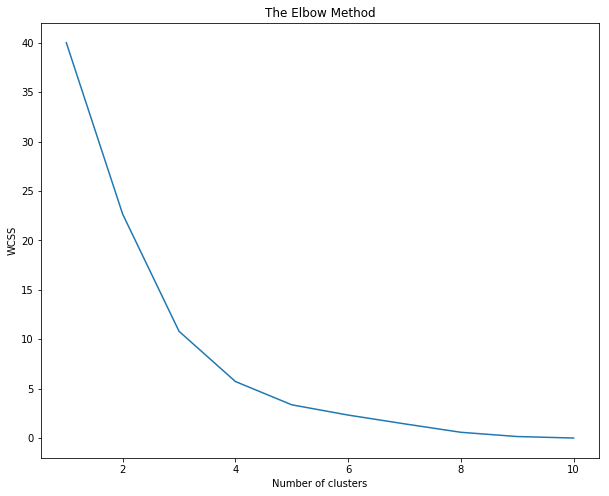

In [5]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering & Cluster Information

In [6]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,,
1,8.2,2375.0,3.0,0.0,1.2,4.5
2,4.7,5166.7,4.7,0.0,11.0,4.7
3,2.7,7833.3,4.7,1.0,1.7,2.7


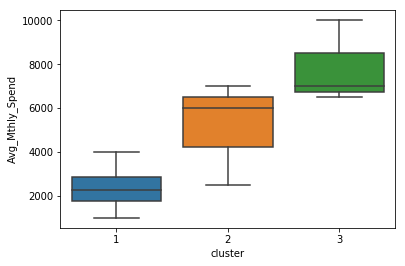

In [7]:
import seaborn as sns
sns.boxplot(dataset1.cluster,dataset1.Avg_Mthly_Spend)

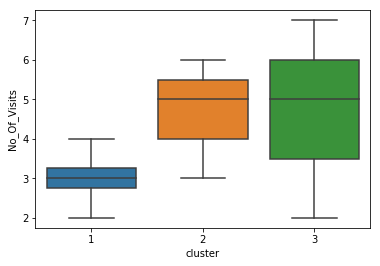

In [8]:
sns.boxplot(dataset1.cluster,dataset1.No_Of_Visits)

In [10]:
dataset1.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,cluster
0,1,A,10000,2,1,1,0,3
1,2,B,7000,3,0,10,9,2
2,3,C,7000,7,1,3,4,3
3,4,D,6500,5,1,1,4,3
4,5,E,6000,6,0,12,3,2


In [9]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(dataset1, dataset1.cluster)
#print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

ValueError: could not convert string to float: 'A'

In [ ]:
#from sklearn.metrics import silhouette_score
#silhouette_score(dataset1)

Business Scenario: Say there are 5 marketing offers that needs to be mapped to individual customers. The business wants you to 
    do a quick analysis to figure out which offer should be given to which customer.
Potential Solution: Perform PCA and then build clusters on the Components or Build clusters on the given data after scaling. 
When you profile the clusters, the behaviors are likely to different across clusters. Based on the behavior, you can decide 
which offer should be given to which group.

Scenario 2: Suppose the business wants to understand, what are the drivers of decline of customer engagement
Assuming that there is a metric to define customer engagement, you can use this metric to build customer clusters. 
Then build individual Random Forests/LR etc models for each cluster to see which variables are affecting that group.

    

In [ ]:
# Cluster 3 is largely composed of premium customers who would shop for all items (Premium Engaged Group)
# Cluster 1 is composed of everyday shoppers (Staple Engaged)
# Cluster 2 is composed of engaged customers from an FnV Perspective ()